# Quick Deep Learning Project
## Artificial Neural Network for cancer prediction classification <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br>

Data source: https://github.com/Pierian-Data

#### Timing the script:

In [1]:
from datetime import datetime
startTime = datetime.now()

#### Dark theme fix:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Basic libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Pandas output visibility:

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

#### Read the data:

In [5]:
df = pd.read_csv('cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### Basic checks:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

#### Basic EDA:

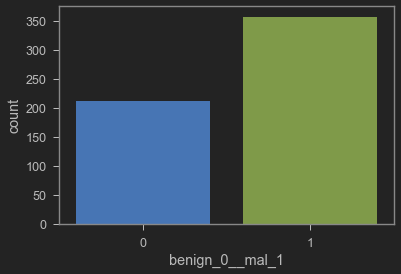

In [9]:
sns.countplot(df['benign_0__mal_1']);

Quite balanced datased - accuracy can be a good measure.

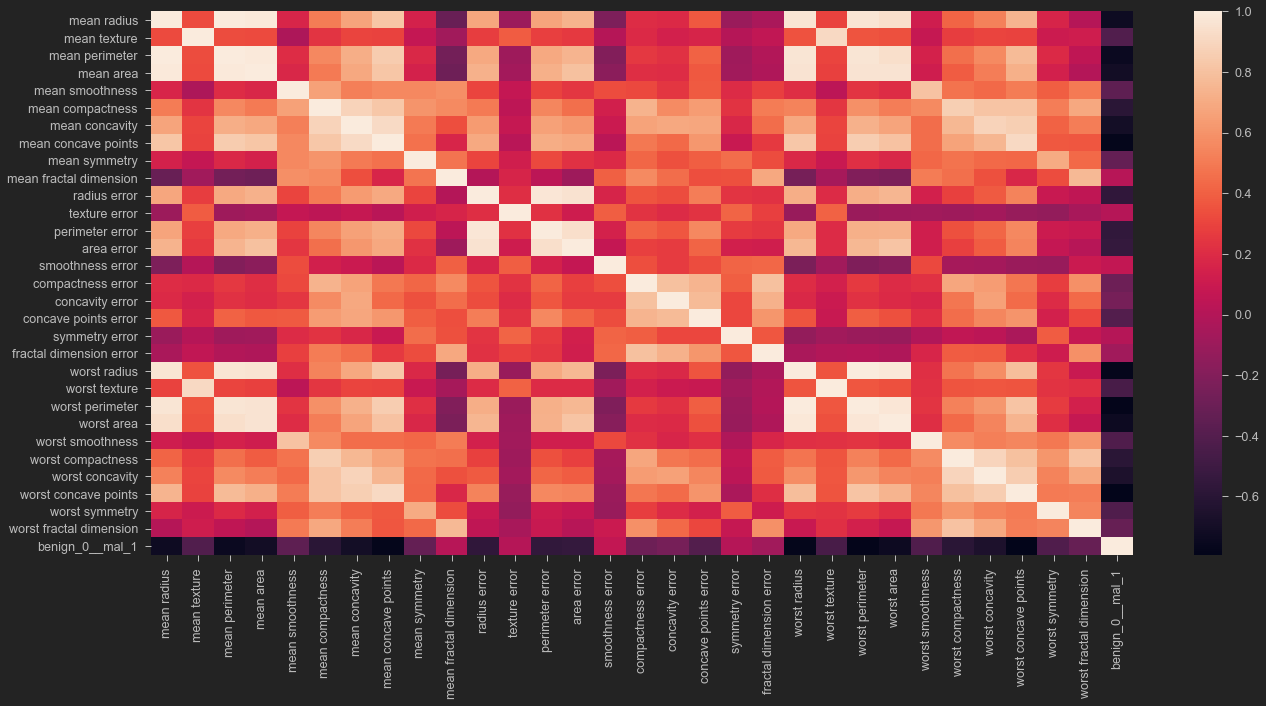

In [10]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr());

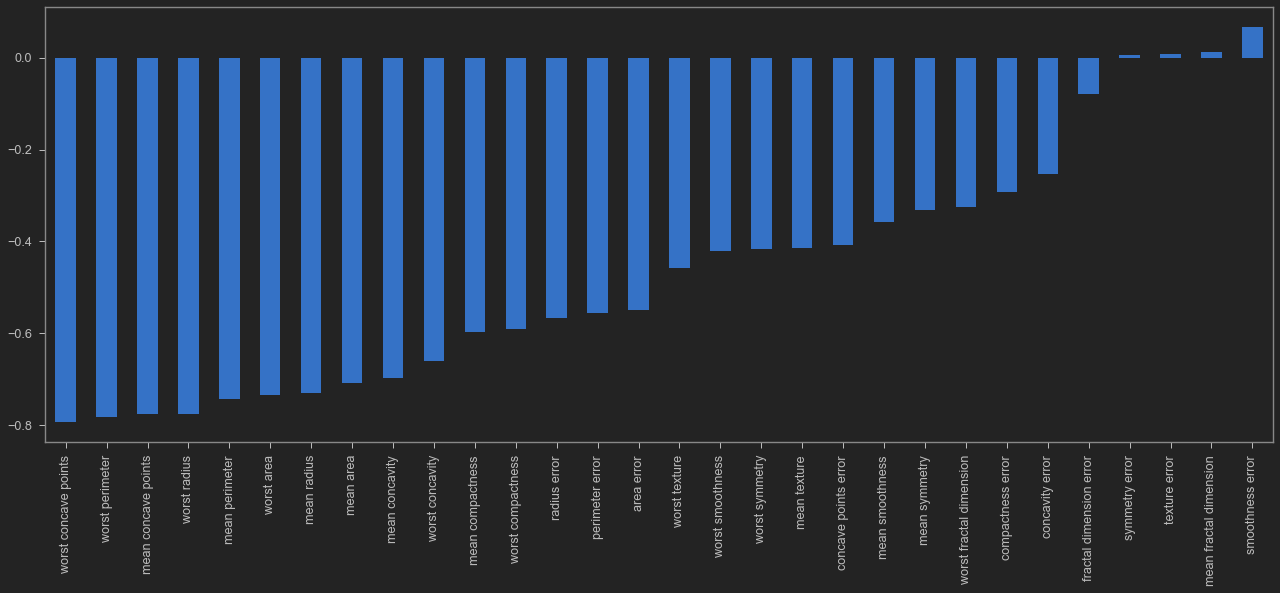

In [11]:
plt.figure(figsize=(22,8))
(df.corr()['benign_0__mal_1'][:-1].sort_values()).plot(kind='bar');

### Train Test split:

In [12]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [13]:
from sklearn.model_selection import train_test_split

#train:       60%
#validation:  20% = 0.25x0.8
#test:        20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Scaling:

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### ANN:

In [15]:
X_train.shape

(341, 30)

In [16]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))     #first layer
ann.add(tf.keras.layers.Dropout(rate=0.25))                     #first dropout
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dropout(rate=0.25))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dropout(rate=0.25))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))   #output layer, binary classification problem - sigmoid !

In [17]:
ann.compile(optimizer='adam', 
            loss='binary_crossentropy',
            metrics = ['accuracy']) 

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',             #minimazing the validation loss, 'auto' usually works fine too
                           verbose=2,              #print feedback with the progress
                           patience=100)           #number of epochs to still do after detecting the stopping point

In [19]:
ann.fit(x = X_train, 
        y = y_train,
        validation_data = (X_val, y_val),
        batch_size = 64, 
        epochs = 500,
        callbacks = [early_stop])

Epoch 1/500
6/6 [==============================] - 0s 35ms/step - loss: 0.6837 - accuracy: 0.5337 - val_loss: 0.6585 - val_accuracy: 0.7281
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6655 - accuracy: 0.6246 - val_loss: 0.6438 - val_accuracy: 0.8333
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6595 - accuracy: 0.6217 - val_loss: 0.6285 - val_accuracy: 0.8246
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6477 - accuracy: 0.7214 - val_loss: 0.6119 - val_accuracy: 0.8509
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6290 - accuracy: 0.7126 - val_loss: 0.5927 - val_accuracy: 0.8421
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6033 - accuracy: 0.7625 - val_loss: 0.5693 - val_accuracy: 0.8772
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.5814 - accuracy: 0.7830 - val_loss: 0.5412 - val_accuracy: 0.8772
Epoch 8/500
6/6 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 0.9707 - val_loss: 0.1418 - val_accuracy: 0.9386
Epoch 60/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 0.9619 - val_loss: 0.1256 - val_accuracy: 0.9474
Epoch 61/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0803 - accuracy: 0.9795 - val_loss: 0.1080 - val_accuracy: 0.9825
Epoch 62/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0700 - accuracy: 0.9824 - val_loss: 0.1062 - val_accuracy: 0.9825
Epoch 63/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0779 - accuracy: 0.9677 - val_loss: 0.1238 - val_accuracy: 0.9474
Epoch 64/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0951 - accuracy: 0.9589 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 65/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0641 - accuracy: 0.9765 - val_loss: 0.1088 - val_accuracy: 0.9737
Epoch 66/500
6/6 [============

6/6 [==============================] - 0s 11ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.1343 - val_accuracy: 0.9561
Epoch 118/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0438 - accuracy: 0.9795 - val_loss: 0.1124 - val_accuracy: 0.9825
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.1130 - val_accuracy: 0.9825
Epoch 120/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0400 - accuracy: 0.9853 - val_loss: 0.1143 - val_accuracy: 0.9737
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9941 - val_loss: 0.1234 - val_accuracy: 0.9737
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 0.9883 - val_loss: 0.1209 - val_accuracy: 0.9737
Epoch 123/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.1161 - val_accuracy: 0.9737
Epoch 124/500
6/6 [======

6/6 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.1275 - val_accuracy: 0.9737
Epoch 176/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.1499 - val_accuracy: 0.9561
Epoch 177/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.1326 - val_accuracy: 0.9737
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.9853 - val_loss: 0.1340 - val_accuracy: 0.9825
Epoch 179/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.1328 - val_accuracy: 0.9737
Epoch 00179: early stopping


### Evaluation:

In [20]:
model_history = pd.DataFrame(ann.history.history)

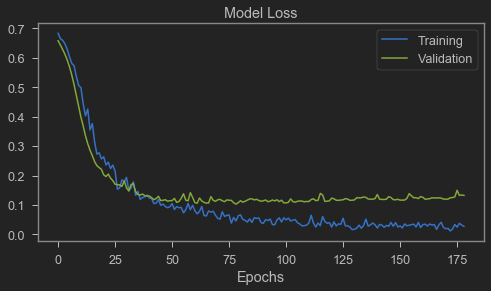

In [21]:
plt.figure(figsize=(8,4))

plt.plot(model_history['loss'], label='Training');
plt.plot(model_history['val_loss'], label='Validation');

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

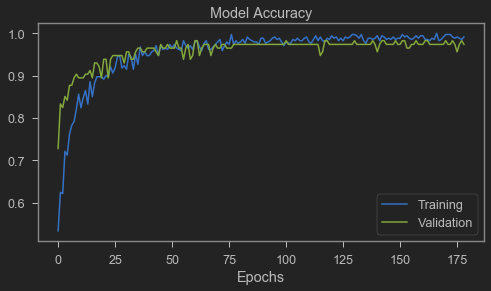

In [22]:
plt.figure(figsize=(8,4))

plt.plot(model_history['accuracy'], label='Training');
plt.plot(model_history['val_accuracy'], label='Validation');

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.show()

### Predictions:

In [23]:
predictions = ann.predict_classes(X_test)                   #will be deprecated in 2021
#predictions = np.argmax(ann.predict(X_test), axis=-1)      #not giving the same result

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


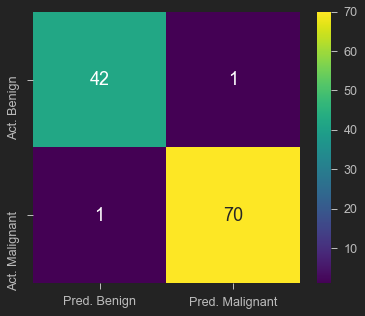

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize = (6,5))
sns.heatmap(confusion_matrix(y_test, predictions), 
            cmap='viridis',
            annot=True, fmt="d", annot_kws={'size':18},
            xticklabels = ['Pred. Benign', 'Pred. Malignant'],
            yticklabels = ['Act. Benign', 'Act. Malignant']);

In [25]:
print(classification_report(y_test, predictions, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        43
   Malignant       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Total time:

In [26]:
print(datetime.now() - startTime)

0:00:21.938229
